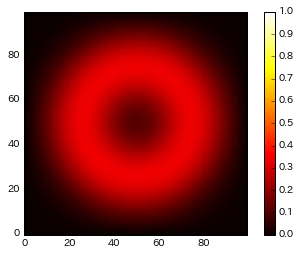

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation
from pylab import *

# グローバル変数＞＜
dx = 0.01
dy = 0.01
a = 0.5

nx = int(1/dx)
ny = int(1/dy)

ui = np.zeros([nx, ny]) # initialize matrices
u = np.zeros([nx, ny])

def initialize_ui(condition, ui, dx, dy, nx, ny):
    for i in range(nx):
        for j in range(ny):
            if condition(i, j, dx, dy):
                ui[i, j] = 1

def evolve_ts(x, im, dx2, dy2, nx, ny, dt, a):
    global u, ui
    u[1:-1, 1:-1] = ui[1:-1, 1:-1] + a*dt*(
                        (ui[2:, 1:-1] - 2*ui[1:-1, 1:-1] + ui[:-2, 1:-1])/dx2
                      + (ui[1:-1, 2:] - 2*ui[1:-1, 1:-1] + ui[1:-1, :-2])/dy2
                    )
    ui = np.copy(u)
    im.set_array(ui)
    return im,

def main():
    global u, ui, dx, dy, nx, ny
    dx2 = dx ** 2
    dy2 = dy ** 2

    dt = dx2*dy2/(2*a*(dx2 + dy2))

    condition = (lambda i, j, dx, dy:
        (((i*dx-0.5)**2+(j*dy-0.5)**2<=0.1)
   
         & ( (i*dx-0.5)**2+(j*dy-0.5)**2>=.05))
    )


    initialize_ui(condition, ui, dx, dy, nx, ny)

    fig = plt.figure()
    img = plt.subplot(111)
    im = img.imshow(ui, cmap=cm.hot, interpolation='nearest', origin='lower')
    im.figure = fig
    fig.colorbar(im)
    ani = animation.FuncAnimation(fig, evolve_ts, 240,
            fargs=(im, dx2, dy2, nx, ny, dt, a,),
            blit=True, interval=50)
    ani.save("diffusion.mp4", fps=15)
    plt.show()

if __name__ == "__main__":
    main()